In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# K-Means


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (10, 7)
plt.style.use('ggplot')

In [ ]:
url = 'https://raw.githubusercontent.com/kvinlazy/Dataset/master/cars_clus.csv'
cars = pd.read_csv(url)
cars.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.000,21.500,1.800,140.000,101.200,67.300,172.400,2.639,13.200,28.000,2.828,0.0
1,Acura,TL,39.384,19.875,0.000,28.400,3.200,225.000,108.100,70.300,192.900,3.517,17.200,25.000,3.673,0.0
2,Acura,CL,14.114,18.225,0.000,$null$,3.200,225.000,106.900,70.600,192.000,3.470,17.200,26.000,2.647,0.0
3,Acura,RL,8.588,29.725,0.000,42.000,3.500,210.000,114.600,71.400,196.600,3.850,18.000,22.000,2.150,0.0
4,Audi,A4,20.397,22.255,0.000,23.990,1.800,150.000,102.600,68.200,178.000,2.998,16.400,27.000,3.015,0.0


In [ ]:
print ("Shape of dataset before cleaning: ", cars.shape)
cars[[ 'sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales']] = cars[['sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales']].apply(pd.to_numeric, errors='coerce')
cars = cars.dropna()
cars = cars.reset_index(drop=True)
print ("Shape of dataset after cleaning: ", cars.shape)
cars.head(5)

Shape of dataset before cleaning:  (159, 16)
Shape of dataset after cleaning:  (117, 16)


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0


In [ ]:
cars_size = cars[["width","length","curb_wgt"]]
cars_size.head()

,width,length,curb_wgt
0,67.3,172.4,2.639
1,70.3,192.9,3.517
2,71.4,196.6,3.850
3,68.2,178.0,2.998
4,76.1,192.0,3.561


In [ ]:
X = np.array(cars_size)
Y = np.array(cars['manufact'].astype(str) + " " + cars["model"])
X

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
cars_norm = pd.DataFrame(scaler.fit_transform(cars_size), columns=cars_size.columns)
cars_norm

,width,length,curb_wgt
0,0.281437,0.306258,0.231056
1,0.461078,0.579228,0.503727
2,0.526946,0.628495,0.607143
3,0.335329,0.380826,0.342547
4,0.808383,0.567244,0.517391
...,...,...,...
112,0.341317,0.185087,0.270807
113,0.341317,0.304927,0.297516
114,0.353293,0.462051,0.356522
115,0.245509,0.146471,0.367702


In [ ]:
X_norm = np.array(cars_norm)
X_norm

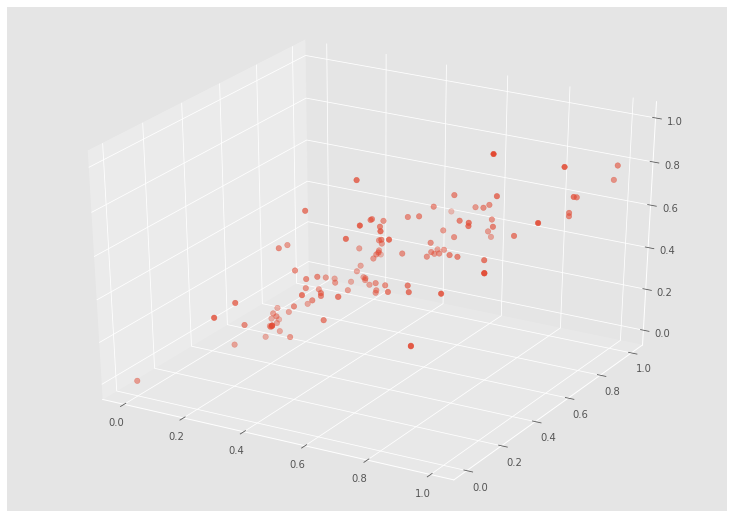

In [ ]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X_norm[:, 0], X_norm[:, 1], X_norm[:, 2], s=30)

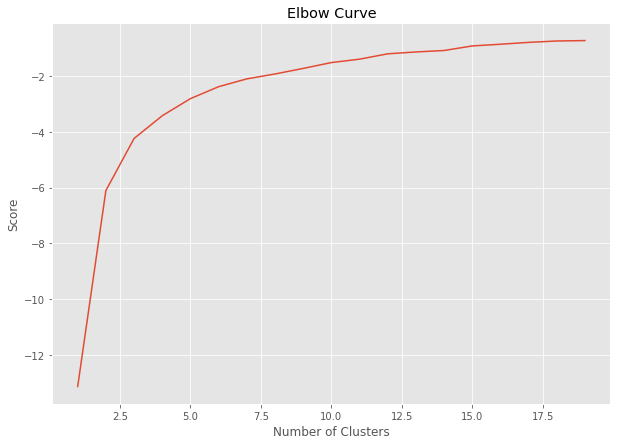

In [ ]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(X_norm).score(X_norm) for i in range(len(kmeans))]
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5).fit(X_norm)
centroids = kmeans.cluster_centers_
print(centroids)

[[0.92994012 0.79014647 0.76093168]
 [0.43804698 0.45392468 0.35940436]
 [0.25449102 0.28077715 0.20022586]
 [0.48203593 0.51140146 0.59703028]
 [0.68283433 0.65774523 0.5447205 ]]


In [ ]:
labels = kmeans.predict(X_norm)
C = kmeans.cluster_centers_

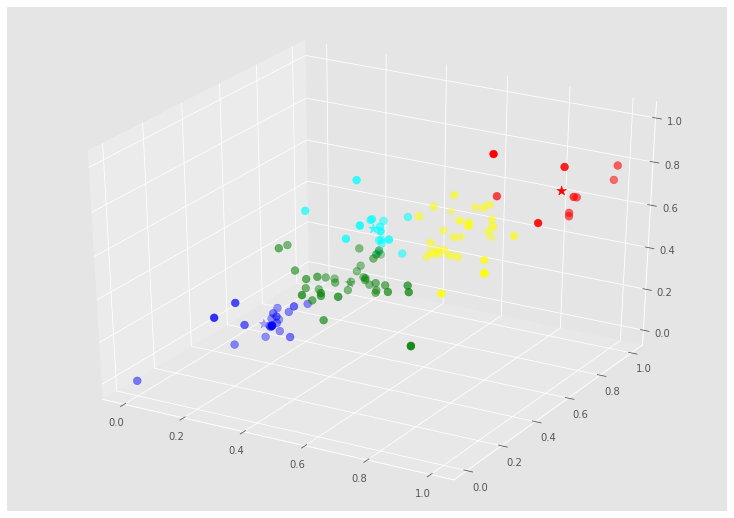

In [ ]:
colores=['red','green','blue','cyan','yellow'] #,'pink','violet','orange'
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X_norm[:, 0], X_norm[:, 1], X_norm[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=100)

In [ ]:
for i in range(len(X)):
  if kmeans.labels_[i] == 3:
    print(Y[i] , "width:", X[i][0], "length:", X[i][1], "weight:", X[i][2])

Acura TL width: 70.3 length: 192.9 weight: 3.517
Acura RL width: 71.4 length: 196.6 weight: 3.85
BMW 528i width: 70.9 length: 188.0 weight: 3.472
Cadillac Catera width: 70.3 length: 194.8 weight: 3.77
Ford Explorer width: 70.2 length: 190.7 weight: 3.8760000000000003
Honda Passport width: 70.4 length: 178.2 weight: 3.8569999999999998
Jeep Grand Cherokee width: 72.3 length: 181.5 weight: 3.88
Lexus GS300 width: 70.9 length: 189.2 weight: 3.638
Mitsubishi Diamante width: 70.3 length: 194.1 weight: 3.443
Mitsubishi Montero width: 69.9 length: 186.6 weight: 4.52
Mercury Mountaineer width: 70.2 length: 190.1 weight: 3.8760000000000003
Mercedes-Benz E-Class width: 70.8 length: 189.4 weight: 3.823
Mercedes-Benz SL-Class width: 71.3 length: 177.1 weight: 4.125
Nissan Pathfinder width: 71.7 length: 182.6 weight: 3.947
Oldsmobile Bravada width: 67.8 length: 181.2 weight: 4.0680000000000005
Toyota Avalon width: 71.7 length: 191.9 weight: 3.417


# Hierarchical Clustering

In [ ]:
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

In [ ]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(X_norm)

In [ ]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs, labels = Y,orientation = 'right',leaf_font_size =12)

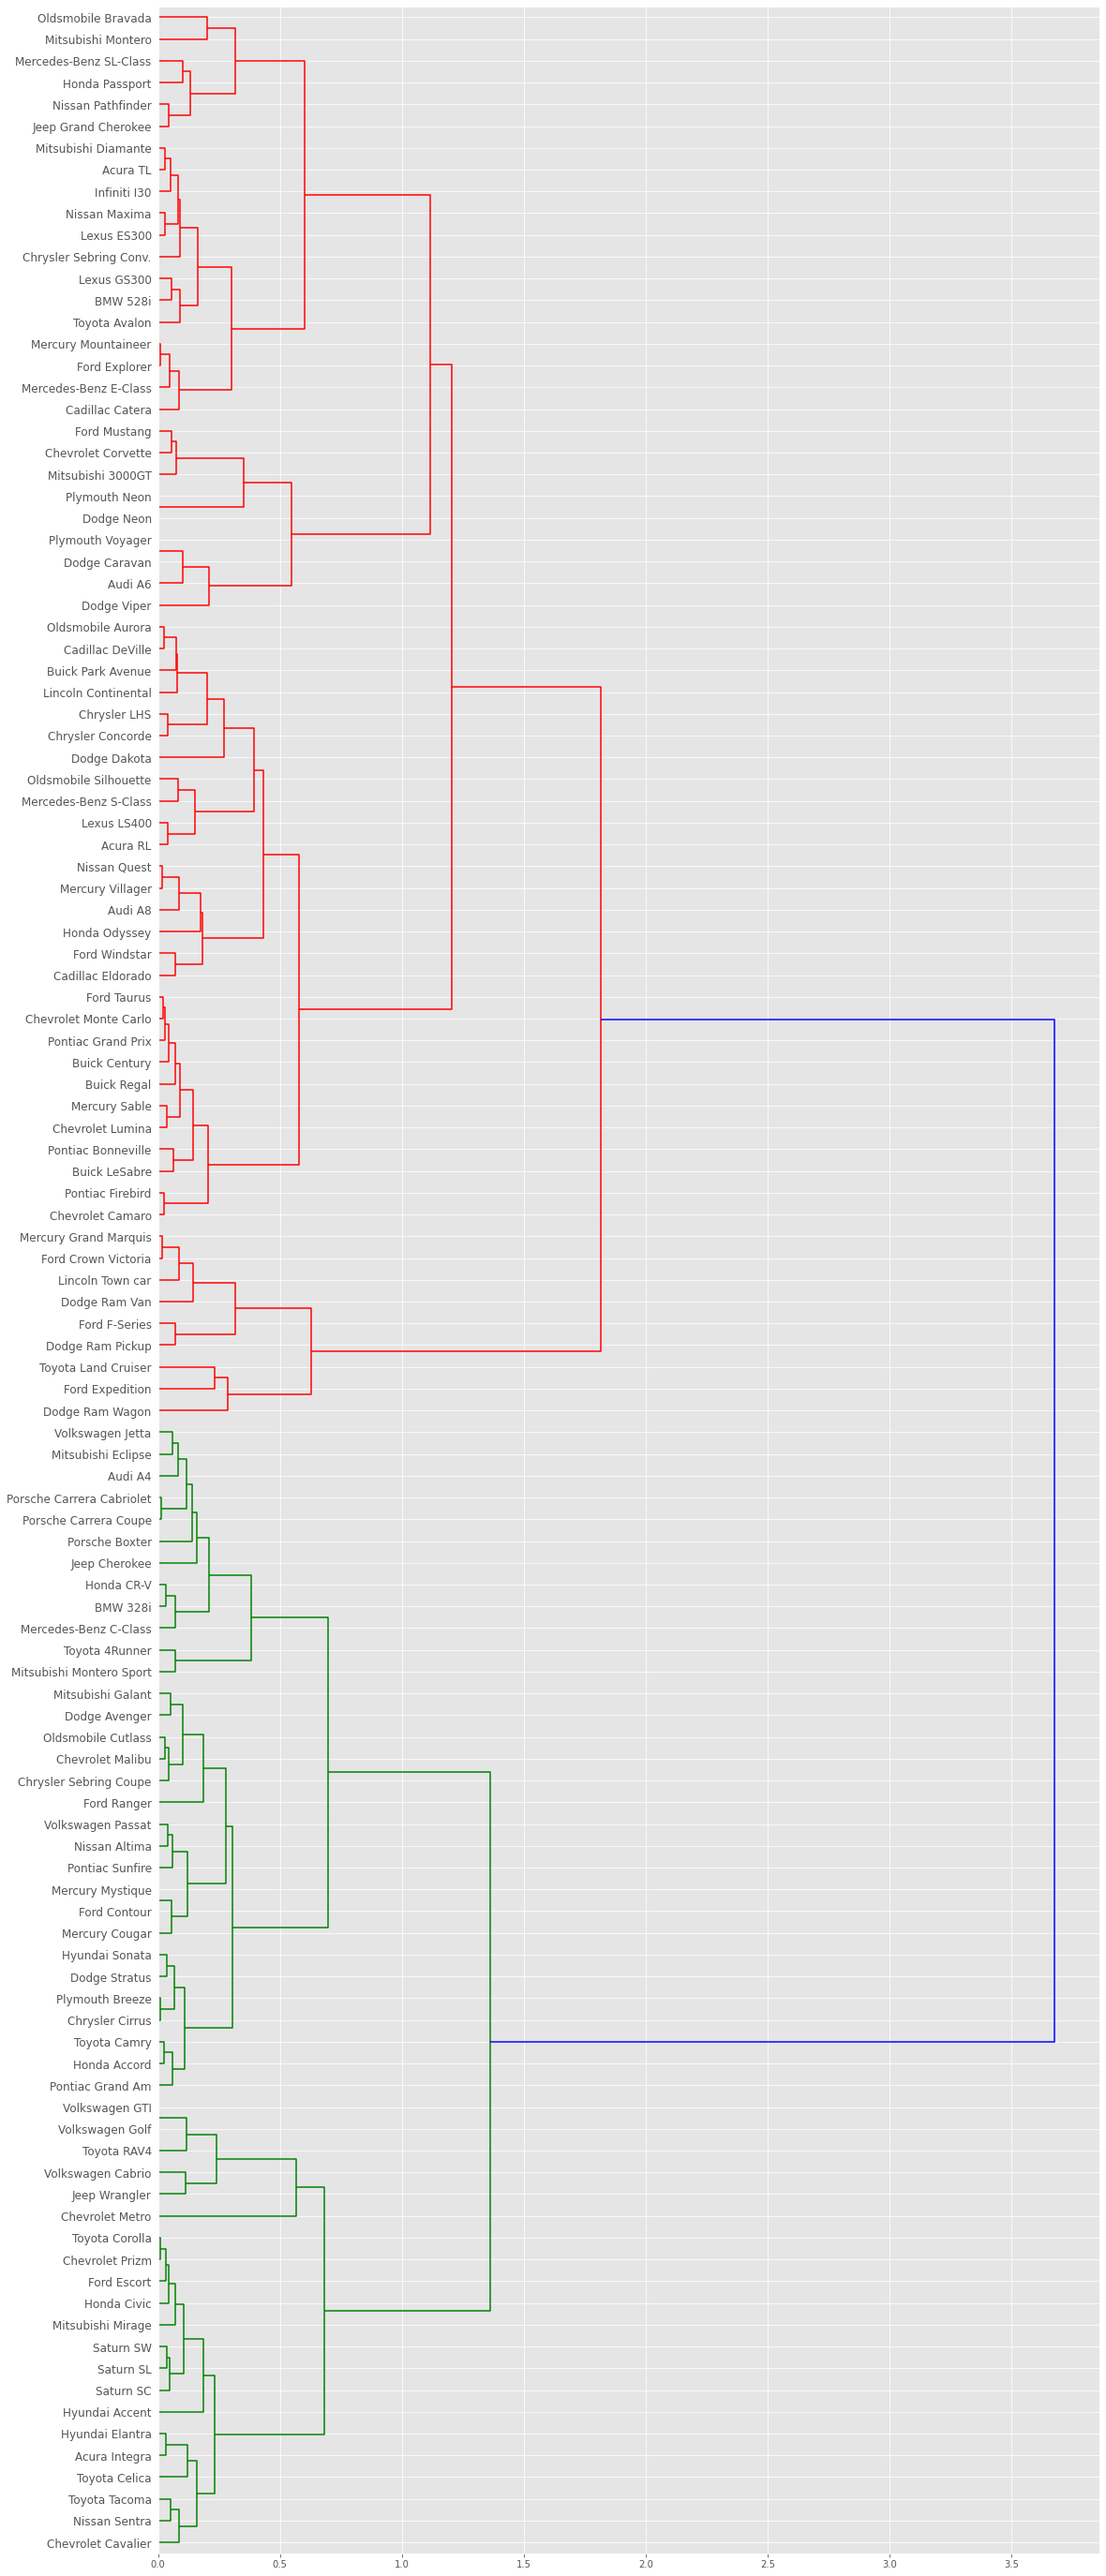

In [ ]:
fig = plt.figure(figsize=(18,50))
plot_dendrogram(model, truncate_mode='level', p=10)